##Plot the monthly number of searches for
flights arriving at Málaga, Madrid or
Barcelona

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import bz2
import csv

In [2]:
ls

Ejercicio 3.ipynb   Ejercicio2.ipynb    data_challenge.pdf
Ejercicio1.ipynb    bookings.csv.bz2    searches.csv.bz2


In [170]:
pd.options.display.max_columns=None
searches_sample=pd.read_csv ("searches.csv.bz2", sep="^", nrows=500000)
searches_samples_clean= searches_sample[['Date', 'Destination']]
searches_samples_clean['contar']=1
#nos quedamos con Date y Destination, y una columna más de contar para luego hacer conteo

#ojo, truco de profe searches_sample=pd.read_csv ("searches.csv.bz2", sep="^", nrows=500000, usecols=["Date","Destination"])
#ya directamente nos traemos date y destination

/var/folders/nn/9rd8vn51433_x8fsjtycsfh80000gq/T/ipykernel_2793/4175569650.py:2: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  searches_sample=pd.read_csv ("searches.csv.bz2", sep="^", nrows=500000)
/var/folders/nn/9rd8vn51433_x8fsjtycsfh80000gq/T/ipykernel_2793/4175569650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  searches_samples_clean['contar']=1


In [171]:
searches_samples_clean['Date']=searches_samples_clean['Date'].str[5:7]
#Sacamos el mes y asignamos a Date (tenemos fecha completa)

/var/folders/nn/9rd8vn51433_x8fsjtycsfh80000gq/T/ipykernel_2793/374554528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  searches_samples_clean['Date']=searches_samples_clean['Date'].str[5:7]


In [172]:
searches_samples_clean_MADBCNAGP= searches_samples_clean [searches_samples_clean['Destination'].isin ({'MAD','BCN','AGP'})]
searches_samples_clean_MADBCNAGP.head()
#filtramos sólo por Madrid, Malaga y Barcelona

,Date,Destination,contar
4,01,MAD,1
93,01,AGP,1
113,01,BCN,1
147,01,AGP,1
151,01,MAD,1


In [173]:
searches_samples_clean_MADBCNAGP=searches_samples_clean_MADBCNAGP.groupby(['Destination','Date']).count().reset_index()
searches_samples_clean_MADBCNAGP.head()
#y ahora hacemos el conteo!!! al agrupar por Destination y Date, se queda sólo la columna contar, el conteo se guarda ahí

,Destination,Date,contar
0,AGP,01,338
1,AGP,02,294
2,AGP,03,374
3,AGP,04,290
4,AGP,05,310


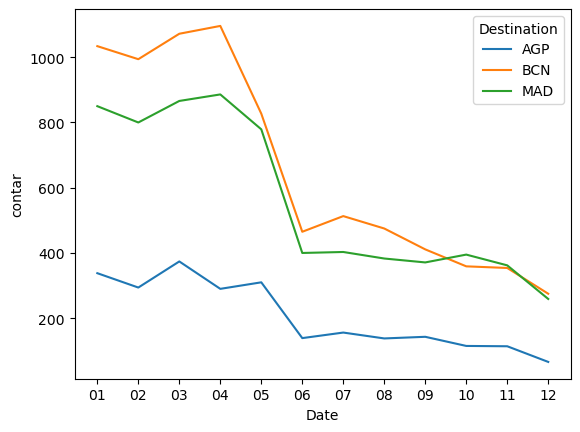

In [175]:
sn.lineplot (data=searches_samples_clean_MADBCNAGP, x='Date', y='contar', hue='Destination');